Disclaimer: It was very hard to get an accuracy of 50% cause the features have `no relations whatsoever` in this dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [32]:
data = pd.read_excel("customer_churn_large_dataset.xlsx")

print(data.shape)
data.head(3)

(100000, 9)


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0


In [33]:
new_data = data.drop(columns=['CustomerID', 'Name'])

print(new_data.shape)
new_data.head(3)

(100000, 7)


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,62.0,Female,New York,1.0,48.76,172.0,0.0
2,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0


### **Data Preprocessing and EDA to get to know your data better**
* *Step 1*: check for null values and duplicated columns
* *Step 2*: Perform Univariate Analysis (Check for distribution of data)
* *Step 3*: Perform Bivariate Analysis (Check for correlation b/w colns)

In [34]:
# check for null values
new_data.isna().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [35]:
# check for duplicated values
new_data.duplicated().sum()

0

In [36]:
# check brief description of data
new_data.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


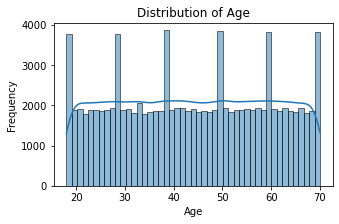

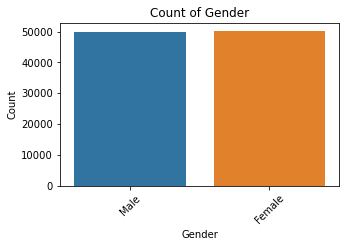

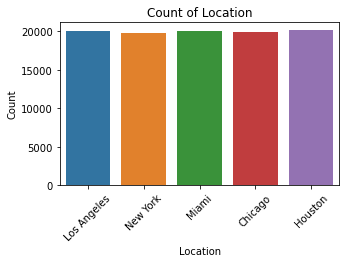

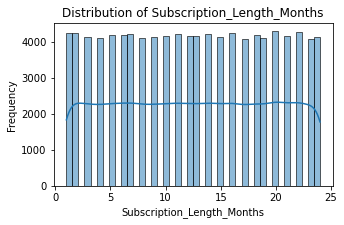

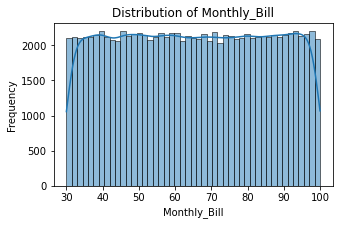

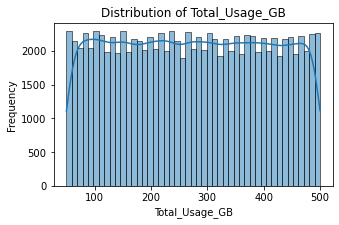

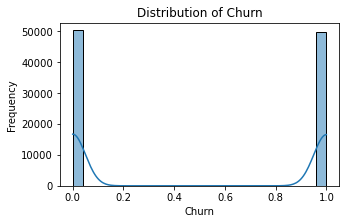

In [37]:
# Loop through each column
for column in new_data.columns:
    # Determine the data type of the column
    dtype = new_data[column].dtype
    
    # If the column is numerical, create a histogram
    if dtype in ['int64', 'float64']:
        plt.figure(figsize=(5, 3))
        sns.histplot(new_data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    
    # If the column is categorical, create a count plot
    elif dtype == 'object':
        plt.figure(figsize=(5, 3))
        sns.countplot(data=new_data, x=column)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


### **Data Visualization**

In [38]:
new_data.sample(1)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
54588,67.0,Female,Los Angeles,21.0,67.87,433.0,0.0


<AxesSubplot:xlabel='Subscription_Length_Months', ylabel='Age'>

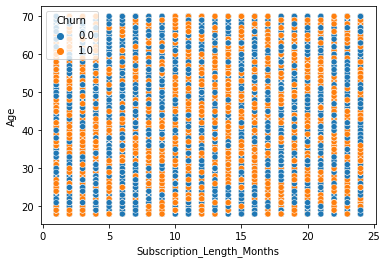

In [39]:
# checking for correlation b/w `Age ` and `Subscription_Length_Months` coln
sns.scatterplot(x=new_data['Subscription_Length_Months'], y=new_data['Age'], hue=new_data['Churn'])

<AxesSubplot:xlabel='Monthly_Bill', ylabel='Age'>

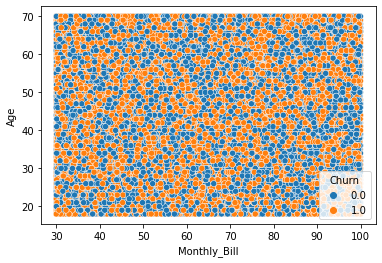

In [40]:
# checking for correlation b/w `Age ` and `Monthly_Bill` coln
sns.scatterplot(x=new_data['Monthly_Bill'], y=new_data['Age'], hue=new_data['Churn'])

<AxesSubplot:xlabel='Total_Usage_GB', ylabel='Age'>

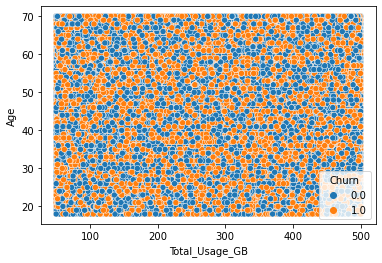

In [41]:
# checking for correlation b/w `Age ` and `Total_Usage_GB` coln
sns.scatterplot(x=new_data['Total_Usage_GB'], y=new_data['Age'], hue=new_data['Churn'])

<AxesSubplot:xlabel='Subscription_Length_Months', ylabel='Total_Usage_GB'>

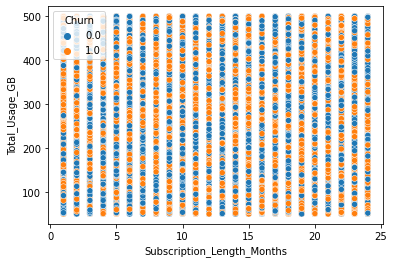

In [42]:
# checking for correlation b/w `Subscription_Length_Months` and `Total_Usage_GB` coln
sns.scatterplot(x=new_data['Subscription_Length_Months'], y=new_data['Total_Usage_GB'], hue=new_data['Churn'])

By Analyzing this data at this extent, I have got to know this dataset is arranged in the manner as there is no relation b/w any columns and even distributions are very uniformly arranged. It suggests all columns holds equal importance in **Model Building**.

In [43]:
new_data.sample(1)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
25458,65.0,Male,New York,4.0,46.92,320.0,1.0


In [44]:
# Divide the data in `features` and `target`
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]

### **Time to Create `Model`**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

In [46]:
# Divide the data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90000, 6), (10000, 6), (90000,), (10000,))

In [47]:
# Differentiate `Categorical` & `Numerical` features
categorical_features = ['Gender', 'Location']
numerical_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Create `StandardScalar` and `OneHotEncoder` Object
one_hot_encoder = OneHotEncoder()
standard_scalar = StandardScaler()


# Create ColumnTransformer Object for `Preprocessing Stuff`
preprocesser = ColumnTransformer(transformers=(
    ('encode_gender', one_hot_encoder, categorical_features),
    ('standardization', standard_scalar, numerical_features)
))

In [48]:
# Create `Model Pipeline` for Logistic Regression
clf = Pipeline(steps=(
    ('preprocessing', preprocesser),
    ('classifier', LogisticRegression())
))

In [49]:
clf.fit(X_train, y_train)
print("Accuracy score of Logistic Regression is: ", clf.score(X_test, y_test))

Accuracy score of Logistic Regression is:  0.4994


In [50]:
# Check score using other metrics like `Precision Score`, `Recall Score`, `F1 Score`
y_pred = clf.predict(X_test)

print("The precision score of Logistic Regression is: ", precision_score(y_test, y_pred))
print("The recall score of Logistic Regression is: ", recall_score(y_test, y_pred))
print("The F1 score of Logistic Regression is: ", f1_score(y_test, y_pred))

The precision score of Logistic Regression is:  0.4985514880168554
The recall score of Logistic Regression is:  0.378978978978979
The F1 score of Logistic Regression is:  0.4306187443130118


In [51]:
# Create `Model Pipeline` for `RandomForestClassifier` 
clf2 = Pipeline(steps=[
    ('preprocessing', preprocesser),
    ('classifier', RandomForestClassifier())
])

In [52]:
clf2.fit(X_train, y_train)
print("The accuracy score of Random Forest Classifier is:", clf2.score(X_test, y_test))

The accuracy score of Random Forest Classifier is: 0.5006


In [53]:
# Check score using other metrics like `Precision Score`, `Recall Score`, `F1 Score`
y_pred = clf2.predict(X_test)

print("The precision score of Logistic Regression is: ", precision_score(y_test, y_pred))
print("The recall score of Logistic Regression is: ", recall_score(y_test, y_pred))
print("The F1 score of Logistic Regression is: ", f1_score(y_test, y_pred))

The precision score of Logistic Regression is:  0.500105641242341
The recall score of Logistic Regression is:  0.47387387387387386
The F1 score of Logistic Regression is:  0.4866365131578947


General Machine Learning is not showing that good of a result, but actually that's very logical as there was not any relation between features and Machine Learning tries to find the best line matching the relation. So, I hadn't expected anything more.

In [54]:
import tensorflow as tf
from tensorflow import keras

In [55]:
# Create `Features` & `Targets`
features = preprocesser.fit_transform(X_train)
targets = y_train

In [56]:
# Create Model using `Sequential` layer
model = keras.Sequential(layers=[
    keras.layers.Dense(units=64, activation="relu", input_shape=(features.shape[1], )),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=1, activation="sigmoid")
])

In [57]:
# Add `Optimizer` and `Loss` function
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [58]:
# Check brief summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [59]:
# Finally time to train the model
model.fit(x=features, y=targets, batch_size=1000, epochs=50, validation_split=0.2)

Epoch 1/50
72/72 [==============================] - 4s 16ms/step - loss: 0.6954 - accuracy: 0.5012 - val_loss: 0.6936 - val_accuracy: 0.4909
Epoch 2/50
72/72 [==============================] - 1s 13ms/step - loss: 0.6937 - accuracy: 0.5025 - val_loss: 0.6935 - val_accuracy: 0.4988
Epoch 3/50
72/72 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.5036 - val_loss: 0.6937 - val_accuracy: 0.4928
Epoch 4/50
72/72 [==============================] - 1s 11ms/step - loss: 0.6934 - accuracy: 0.5034 - val_loss: 0.6934 - val_accuracy: 0.4976
Epoch 5/50
72/72 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6934 - val_accuracy: 0.5011
Epoch 6/50
72/72 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5054 - val_loss: 0.6934 - val_accuracy: 0.4982
Epoch 7/50
72/72 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6933 - val_accuracy: 0.5009
Epoch 8/50
72/

Even a well curated `Deep Learning` model was not able to get accuracy over 51% on validation set. At the very least this was expected with the dataset it was training on.

In [60]:
# Test the model
test_features = preprocesser.transform(X_test)
test_targets = y_test

model.evaluate(test_features, test_targets)

313/313 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4964


[0.6944742798805237, 0.49639999866485596]

## Report

* The data has little(or no) correlations among the features.
* The distribution(visualization) is naive! because of the 
  disproportionality in the features.
* Despite running different ml 
  <a href="https://github.com/DeependraParichha1004/MachineLearningProjects/blob/main/customer-churn-prediction.ipynb">models(adaboost, xgboost, svm etc.,)</a> the accuracy was barely improving.
* The above model shows even after learning the deep learning model
  the accuracy didn't shown up.
* The performance of the model could improve if:<br>
   (1) remove the errors in the label using cleanlab library.<br>
   (2) we induced more correlated features.<br>
   (3) adding little noise(positive).
 
Thanks!💫